In [2]:
import numpy as numpy
import matplotlib.pyplot as plotlib
import pandas as pandas

# Laboratorio 03: Raíces.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Kevin Velasquez Gonzalez
*Métodos computacionales 2025-I*

---

# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

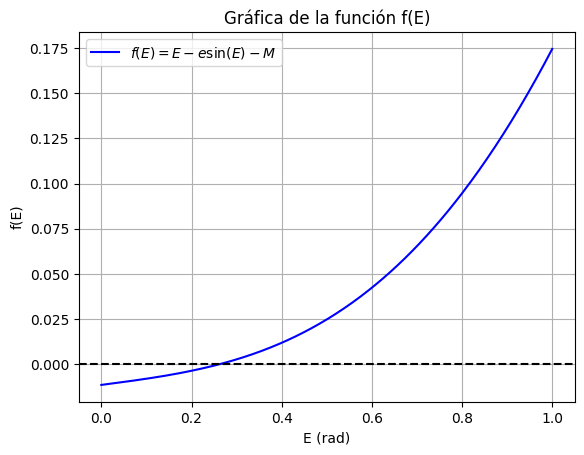

In [108]:
# Parámetros del cometa Halley
e = 0.9672671
T = 75.9600
t0 = 1986.1113
t = 1986.25  # Aproximación al 1 de abril de 1986

# Anomalía media M
def M(t):
    return ((2 * numpy.pi) / T) * (t - t0)

M_val = M(t)

# Definir f(E) = E - e*sin(E) - M
def f(E):
    return E - e * numpy.sin(E) - M_val

# ---------------------------
# Gráfica de f(E)
# ---------------------------
E_vals = numpy.linspace(0, 1, 500)
f_vals = f(E_vals)

plotlib.plot(E_vals, f_vals, label=r'$f(E) = E - e \sin(E) - M$', color='blue')
plotlib.axhline(0, color='black', linestyle='--')
plotlib.xlabel("E (rad)")
plotlib.ylabel("f(E)")
plotlib.title("Gráfica de la función f(E)")
plotlib.grid()
plotlib.legend()
plotlib.show()

In [109]:
# -----------------------------------
# Función derivada de f(E)
# -----------------------------------
def f_prime(E):
    """
    Calcula la derivada de la ecuación f(E).
    
    Parámetros:
    E : float
        Valor de la variable E.

    Retorna:
    float : Valor de la derivada f'(E).
    """
    return 1 - e * numpy.cos(E)  # Derivada de f(E), relacionada con la ecuación de Kepler.

# -----------------------------------
# Método de Newton para resolver f(E) = 0
# -----------------------------------
def newton(E0=3.0, tol=1e-10, max_iter=100):
    """
    Implementa el método de Newton-Raphson para encontrar la raíz de f(E).

    Parámetros:
    E0 : float, opcional
        Valor inicial para la iteración (por defecto 3.0).
    tol : float, opcional
        Tolerancia de convergencia (por defecto 1e-10).
    max_iter : int, opcional
        Número máximo de iteraciones (por defecto 100).

    Retorna:
    float : Valor aproximado de la raíz de f(E).
    """
    E = E0
    for _ in range(max_iter):
        f_val = f(E)   # Evaluación de la función
        fp_val = f_prime(E)  # Evaluación de la derivada

        # Evita divisiones por valores muy pequeños en la derivada
        if abs(fp_val) < 1e-10:
            break  

        # Aplicación de la fórmula de Newton-Raphson
        E_new = E - f_val / fp_val
        
        # Criterio de convergencia
        if abs(E_new - E) < tol:
            return E_new  
        
        E = E_new  # Actualización del valor de E

    return E  # Retorna el último valor calculado

# -----------------------------------
# Método de la secante para resolver f(E) = 0
# -----------------------------------
def secante(E0=3.0, E1=3.5, tol=1e-10, max_iter=100):
    """
    Implementa el método de la secante para encontrar la raíz de f(E).

    Parámetros:
    E0 : float, opcional
        Primer valor inicial (por defecto 3.0).
    E1 : float, opcional
        Segundo valor inicial (por defecto 3.5).
    tol : float, opcional
        Tolerancia de convergencia (por defecto 1e-10).
    max_iter : int, opcional
        Número máximo de iteraciones (por defecto 100).

    Retorna:
    float : Valor aproximado de la raíz de f(E).
    """
    f0 = f(E0)
    f1 = f(E1)

    for _ in range(max_iter):
        # Evita divisiones por valores muy pequeños
        if abs(f1 - f0) < 1e-12:
            break
        
        # Aplicación de la fórmula de la secante
        E2 = E1 - f1 * (E1 - E0) / (f1 - f0)
        
        # Criterio de convergencia
        if abs(E2 - E1) < tol:
            return E2
        
        # Actualización de valores para la siguiente iteración
        E0, f0 = E1, f1
        E1, f1 = E2, f(E2)

    return E1  # Retorna el último valor calculado

# -----------------------------------
# Cálculo y visualización de resultados
# -----------------------------------
E_newton = newton()
E_secante = secante()

# Imprime los resultados de cada método
print(f"Método de Newton: E = {E_newton:.3f}")
print(f"Método de la secante: E = {E_secante:.3f}")

Método de Newton: E = 0.262
Método de la secante: E = 0.262


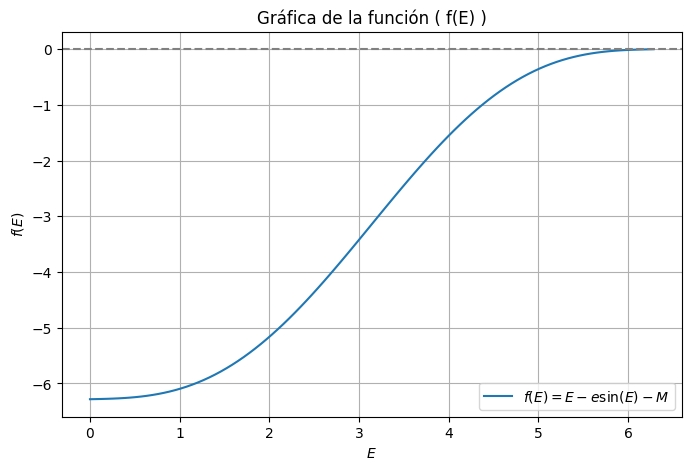

In [58]:
# Parámetros
e = 0.967  # Excentricidad del cometa Halley
E_vals = numpy.linspace(0, 2 * numpy.pi, 100)  # Valores de E en un intervalo típico
# Función de Kepler
def f(E, e, M):
    return E - e * numpy.sin(E) - M

# Evaluar la función
f_vals = f(E_vals, e, M_val)

# Graficar
plotlib.figure(figsize=(8, 5))
plotlib.plot(E_vals, f_vals, label=r"$f(E) = E - e \sin(E) - M$")
plotlib.axhline(0, color='gray', linestyle='--')  # Línea de referencia en f(E) = 0
plotlib.xlabel(r"$E$")
plotlib.ylabel(r"$f(E)$")
plotlib.title("Gráfica de la función ( f(E) )")
plotlib.legend()
plotlib.grid()
plotlib.show()

In [110]:
# Parámetros
e = 0.967  # Excentricidad del cometa Halley 

# Función de Kepler
def f(E, e, M):
    return E - e * numpy.sin(E) - M

# Derivada de f(E) (para Newton)
def df(E, e):
    return 1 - e * numpy.cos(E)

# Método de Newton
def newton(e, M, E_init=0, tol=1e-6, max_iter=100):
    E = E_init  # Primera aproximación
    for _ in range(max_iter):
        F = f(E, e, M)
        dF = df(E, e)
        E_new = E - F / dF
        if abs(E_new - E) < tol:
            return E_new
        E = E_new
    return E

# Método de la secante
def secante(e, M, E0=0, E1=0.1, tol=1e-6, max_iter=100):
    for _ in range(max_iter):
        F0, F1 = f(E0, e, M), f(E1, e, M)
        if abs(F1 - F0) < tol:
            return E1
        E2 = E1 - F1 * (E1 - E0) / (F1 - F0)
        if abs(E2 - E1) < tol:
            return E2
        E0, E1 = E1, E2
    return E1

# Encontrar raíces usando ambos métodos
E_newton = newton(e, M_val)
E_secant = secante(e, M_val)

print(f"Raíz encontrada con el método de Newton: E ≈ {E_newton:.6f}")
print(f"Raíz encontrada con el método de la secante: E ≈ {E_secant:.6f}")


Raíz encontrada con el método de Newton: E ≈ 0.261063
Raíz encontrada con el método de la secante: E ≈ 0.261063


# 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [115]:
# Temperatura fija
T = 0.5

# Definimos f(m) = m - tanh(m/T)
def f(m):
    T = 0.5
    return m - numpy.tanh(m / T)

# Derivada para Newton: f'(m)
def df(m):
    T = 0.5
    return 1 - (1 / T) * (1 / numpy.cosh(m / T))**2


In [116]:
def NewtonRaphson(f,fprime,x0,tol=1e-8,maxiter=100):
    aproximaciones=[]
    for n in range(maxiter):
        fx0=f(x0)
        dfx0=fprime(x0)
        if dfx0==0:
            raise ValueError("df(x0) es cero, el método no puede continuar")
        x1=x0-fx0/dfx0
        aproximaciones.append(x1)
        if abs(x1-x0)<tol:
            return x1
        x0=x1
    raise RuntimeError(f"El método no converge después de {maxiter} iteraciones")

In [117]:
def Secante(f, x0, x1, tol=1e-8, maxiter=100):
    """
    Implementa el método de la secante para encontrar la raíz de una función f(x).

    Parámetros:
    f : function
        Función que queremos resolver, es decir, encontrar su raíz.
    x0 : float
        Primer valor inicial para la aproximación.
    x1 : float
        Segundo valor inicial para la aproximación.
    tol : float, opcional
        Tolerancia de convergencia. El método se detiene cuando la diferencia entre aproximaciones consecutivas
        es menor que este valor (por defecto 1e-8).
    maxiter : int, opcional
        Número máximo de iteraciones permitidas (por defecto 100).

    Retorna:
    float : Aproximación de la raíz de f(x).

    Excepciones:
    ValueError : Se lanza si el denominador de la fórmula de la secante es cero, lo que impide continuar.
    RuntimeError : Se lanza si el método no converge después del número máximo de iteraciones.
    """
    
    for n in range(maxiter):
        fx0 = f(x0)  # Evaluación de la función en x0
        fx1 = f(x1)  # Evaluación de la función en x1
        
        # Evita una división por cero en la fórmula de la secante
        if fx1 - fx0 == 0:
            raise ValueError("No converge con esos valores")  

        # Fórmula de actualización del método de la secante
        x2 = x1 - (fx1 * (x1 - x0)) / (fx1 - fx0)
        
        # Criterio de convergencia basado en tolerancia
        if abs(x2 - x1) < tol:
            return x2  
        
        # Actualización de los valores para la siguiente iteración
        x0, x1 = x1, x2  
    
    # Si se alcanza el número máximo de iteraciones sin converger, se lanza una excepción
    raise RuntimeError(f"No converge después de {maxiter} iteraciones")

In [118]:
raiz=NewtonRaphson(f,df,0.7,1e-12)
print(f"{raiz:.4}")

0.9575


In [119]:
raiz=Secante(f,0.7,0.9)
print(f"{raiz:.4}")

0.9575


In [120]:
def punto_fijo(f, m0, tol=1e-8, maxiter=100):
    """
    Implementa el método de iteración de punto fijo para encontrar una solución a la ecuación f(m) = m.

    Parámetros:
    f : function
        Función de iteración que queremos resolver.
    m0 : float
        Valor inicial de la aproximación.
    tol : float, opcional
        Tolerancia para la convergencia, el método se detiene cuando |m1 - m0| < tol (por defecto 1e-8).
    maxiter : int, opcional
        Número máximo de iteraciones permitidas (por defecto 100).

    Retorna:
    float : Aproximación de la solución.

    Excepciones:
    RuntimeError : Se lanza si se alcanza el número máximo de iteraciones sin que el método haya convergido.
    """
    
    n = 0  # Contador de iteraciones
    
    while n < maxiter:
        m1 = f(m0)  # Evaluación de la función en el punto actual
        
        # Criterio de convergencia: si la diferencia entre aproximaciones es menor que la tolerancia, se detiene
        if abs(m1 - m0) < tol:
            return m1
        
        # Actualización del valor para la siguiente iteración
        m0 = m1  
        n += 1  
    
    # Si se alcanza el número máximo de iteraciones sin converger, se lanza una excepción
    raise RuntimeError("Número máximo de iteraciones alcanzado")

In [121]:
def g(m):
        return numpy.tanh(m / T)
T = 0.5
m0 = 0.5  # Estimación inicial
m_result = punto_fijo(g, m0)

print(f"{m_result:.4}")

0.9575


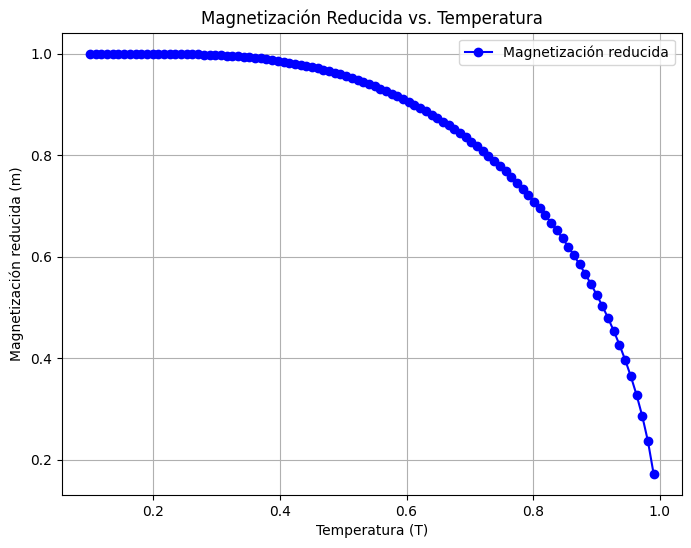

In [122]:
T_valores = numpy.linspace(0.1, 0.99, 100)
m_valores = []

for T in T_valores:
    f = lambda m: m - numpy.tanh(m / T)  # Función para la secante
    m_estimado = Secante(f, 0.5, 0.6)  # Estimaciones iniciales cercanas a la solución
    m_valores.append(m_estimado)

# Graficar la magnetización reducida como función de T
plotlib.figure(figsize=(8, 6))
plotlib.plot(T_valores, m_valores, marker='o', linestyle='-', color='b', label='Magnetización reducida')
plotlib.xlabel('Temperatura (T)')
plotlib.ylabel('Magnetización reducida (m)')
plotlib.title('Magnetización Reducida vs. Temperatura')
plotlib.legend()
plotlib.grid()
plotlib.show()

# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  



In [123]:
def G(T):
    """
    Calcula la función de energía libre de Gibbs en función de la temperatura.

    Parámetros:
    T : float
        Temperatura en Kelvin.

    Retorna:
    float : Valor de la energía libre de Gibbs en Julios.

    Notas:
    - G es una constante inicial (presumiblemente una energía de referencia).
    - T0 es una temperatura de referencia en Kelvin.
    - R es la constante universal de los gases en J/(mol*K).
    - La expresión matemática sigue una forma logarítmica con un exponente fraccionario.
    """
    
    G = -1e-5  # Energía inicial en julios
    T0 = 4.444  # Temperatura de referencia en Kelvin
    R = 8.314  # Constante de los gases en J/K
    
    return -G - R * T * numpy.log((T / T0) ** (5 / 2))  # Expresión de la energía libre de Gibbs

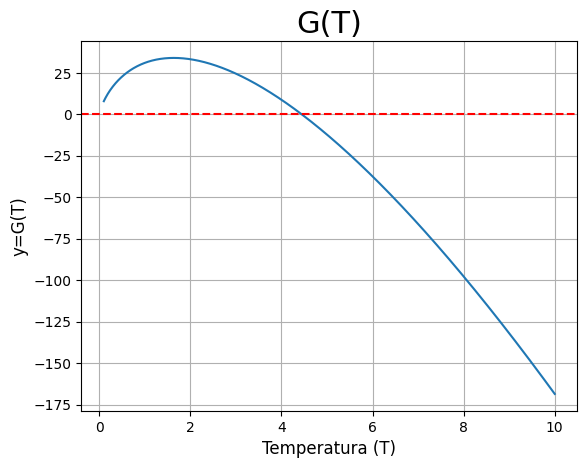

In [124]:
#se grafica G para encontrar su raíz
T=numpy.linspace(0.1,10,1000)
y=G(T)
plotlib.plot(T,y)
plotlib.axhline(0,color="red",linestyle="--")
plotlib.grid()
plotlib.title("G(T)", fontsize=22)
plotlib.ylabel("y=G(T)",fontsize=12)
plotlib.xlabel("Temperatura (T)", fontsize=12)
plotlib.show()

In [125]:
raiz=Secante(G, 4,5) #se encuentra su raíz con el método de la secante
print(f"{raiz:.10}")

4.444000481


# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2$, resolviendo la ecuación $I(x) - I_0/2 = 0$ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.  
- Usar un paso $h = 0.5$ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**  
Puede tomar $I_0=1$.

In [126]:
def I(x):
    """
    Calcula la intensidad I en función de x, basada en una expresión con seno y una dependencia cuadrática.

    Parámetros:
    x : float
        Variable de entrada, comúnmente relacionada con un fenómeno de difracción.

    Retorna:
    float : Valor de la intensidad normalizada.

    Notas:
    - I0 es la intensidad inicial, establecida en 1.
    - Se usa la función seno, dividiendo por x, lo cual es común en patrones de difracción.
    - Se maneja el caso especial cuando x = 0 para evitar una división por cero.
    """
    
    I0 = 1  # Intensidad inicial
    
    if x == 0:  # Evita división por cero cuando x es exactamente 0
        return I0  
    
    I = I0 * ((numpy.sin(x) / x) ** 2)  # Expresión matemática de la intensidad
    
    return I

In [127]:
def derivada(x):
    """
    Calcula la derivada de la función de intensidad I(x).

    Parámetros:
    x : float
        Variable de entrada en la función.

    Retorna:
    float : Valor de la derivada de I(x).

    Notas:
    - I0 representa la intensidad inicial.
    - Se maneja el caso especial cuando x = 0, devolviendo 0 para evitar división por cero.
    - La expresión contiene términos seno y coseno, lo cual es común en problemas de difracción e interferencia.
    """
    
    I0 = 1  # Intensidad inicial
    
    if x == 0:  # Manejo del caso especial para evitar división por cero
        return 0  
    
    derivada = ((2 * I0) / x) * (numpy.cos(x) - (numpy.sin(x) / x)) * (numpy.sin(x) / x)  # Expresión matemática de la derivada
    
    return derivada

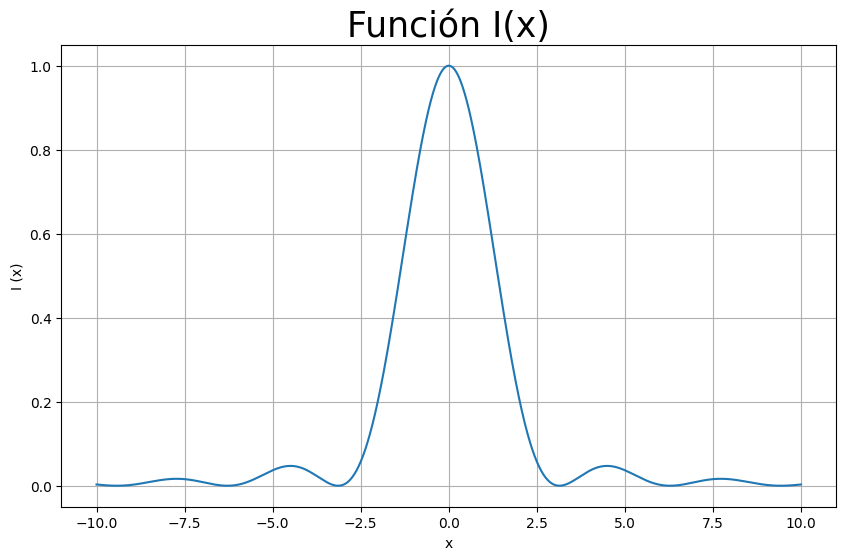

In [18]:
#gráfica de I(x)
x=numpy.linspace(-10,10,1000)
y=[]
for i in x:
    y.append(I(i))
plotlib.figure(figsize=(10,6))
plotlib.plot(x,y)
plotlib.ylabel("I (x)")
plotlib.xlabel("x")
plotlib.title("Función I(x)", fontsize=25)
plotlib.grid()
plotlib.show()

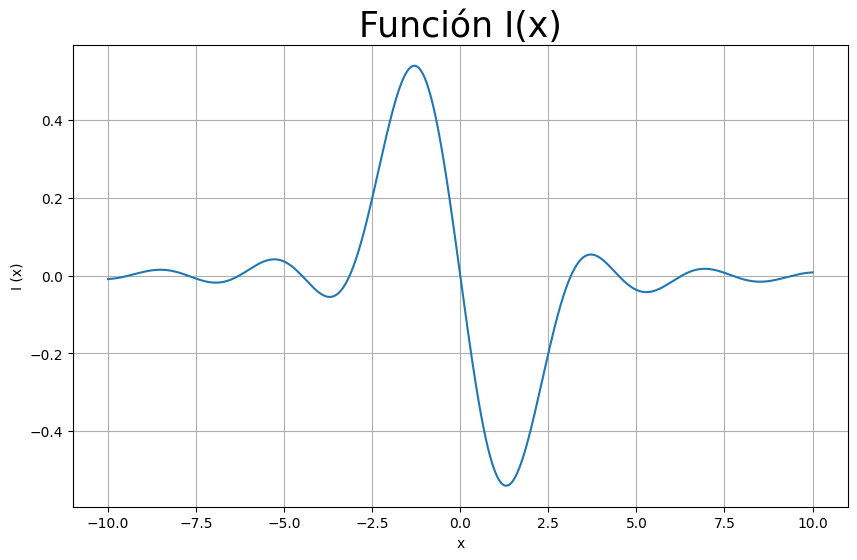

In [19]:
#gráfica de I´(x)
x=numpy.linspace(-10,10,1000)
y=[]
for i in x:
    y.append(derivada(i))
plotlib.figure(figsize=(10,6))
plotlib.plot(x,y)
plotlib.ylabel("I (x)")
plotlib.xlabel("x")
plotlib.title("Función I(x)", fontsize=25)
plotlib.grid()
plotlib.show()

In [128]:
def ecuacion(x):
    """
    Define una ecuación basada en la función de intensidad I(x).

    Parámetros:
    x : float
        Variable de entrada en la ecuación.

    Retorna:
    float : Resultado de la expresión I(x) - I0/2.

    Notas:
    - I0 representa la intensidad inicial, establecida en 1.
    - La ecuación se basa en una reducción de la intensidad a la mitad de su valor máximo.
    - Puede ser útil en problemas donde se busca un umbral específico de intensidad.
    """
    
    I0 = 1  # Intensidad inicial
    
    return I(x) - I0 / 2  # Evaluación de la ecuación basada en I(x)

In [21]:
raiz=Secante(ecuacion, numpy.pi,2) #se encuentra la raíz
print(f"{raiz:.4f}")

1.3916


In [129]:
import numpy as numpy

# -----------------------------------
# Función I(x)
# -----------------------------------
def I(x):
    """
    Calcula la función de intensidad I(x), basada en la razón entre el seno de x y x.

    Parámetros:
    x : float
        Variable de entrada.

    Retorna:
    float : Valor de la intensidad normalizada.

    Notas:
    - La expresión ((sin(x) / x) ** 2) es común en óptica y patrones de difracción.
    - Se maneja el caso especial x ≈ 0, donde la función tiende a 1 para evitar una división por cero.
    """
    if abs(x) < 1e-8:  # Manejo de valores cercanos a cero
        return 1
    return (numpy.sin(x) / x) ** 2

# -----------------------------------
# Derivada de I(x)
# -----------------------------------
def I_derivada(x):
    """
    Calcula la derivada de la función de intensidad I(x).

    Parámetros:
    x : float
        Variable de entrada.

    Retorna:
    float : Valor de la derivada de I(x).

    Notas:
    - Se usa una combinación de seno y coseno en la expresión matemática.
    - Para evitar problemas numéricos, la función retorna 0 cuando x es pequeño.
    """
    if abs(x) < 1e-8:  # Manejo de valores cercanos a cero
        return 0
    
    s = numpy.sin(x)
    c = numpy.cos(x)
    
    return 2 * (s / x) * ((x * c - s) / x**2)

# -----------------------------------
# Método de la secante para encontrar ceros de I'(x)
# -----------------------------------
def secante(f, x0, x1, tol=1e-6, max_iter=100):
    """
    Implementa el método de la secante para encontrar un cero de una función f(x).

    Parámetros:
    f : function
        Función a resolver.
    x0 : float
        Primer punto de referencia.
    x1 : float
        Segundo punto de referencia.
    tol : float, opcional
        Criterio de tolerancia para convergencia (por defecto 1e-6).
    max_iter : int, opcional
        Número máximo de iteraciones permitidas (por defecto 100).

    Retorna:
    float | None : Aproximación de la raíz si se encuentra, de lo contrario None.

    Notas:
    - Se evita la división por cero verificando que |f(x1) - f(x0)| no sea demasiado pequeño.
    - Si la diferencia entre iteraciones cae por debajo de tol, se considera que el método ha convergido.
    """
    for _ in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)

        # Evita división por cero en la fórmula
        if abs(fx1 - fx0) < 1e-12:
            return None
        
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)

        # Criterio de convergencia
        if abs(x2 - x1) < tol:
            return x2
        
        x0, x1 = x1, x2
    
    return None  # Si no converge, retorna None

# -----------------------------------
# Búsqueda de máximos locales de I(x)
# -----------------------------------
def buscar_maximos(rango_ini, rango_fin, pasos):
    """
    Busca máximos locales de I(x) en un intervalo dado.

    Parámetros:
    rango_ini : float
        Inicio del rango de búsqueda.
    rango_fin : float
        Fin del rango de búsqueda.
    pasos : int
        Número de divisiones del intervalo.

    Retorna:
    list : Lista de tuplas (x, I(x)) donde se encontraron máximos locales.

    Notas:
    - Se usa el método de la secante para encontrar ceros de I'(x).
    - Se verifica si el punto encontrado es un máximo comparándolo con valores cercanos.
    - Se evita agregar valores muy cercanos entre sí mediante una condición de separación mínima.
    """
    maximos = []
    xs = numpy.linspace(rango_ini, rango_fin, pasos)  # Discretización del intervalo

    for i in range(len(xs) - 1):
        x0, x1 = xs[i], xs[i + 1]

        try:
            raiz = secante(I_derivada, x0, x1)  # Encontrar ceros de I'(x)

            if raiz is not None:
                # Verifica si es un máximo local comparando valores cercanos
                eps = 1e-4
                if I(raiz - eps) < I(raiz) > I(raiz + eps):
                    # Evita agregar valores demasiado cercanos a otros ya detectados
                    if all(abs(raiz - m[0]) > 0.05 for m in maximos):
                        maximos.append((raiz, I(raiz)))

        except:
            continue  # Ignora posibles errores numéricos
    
    return maximos

# -----------------------------------
# Ejecución del análisis
# -----------------------------------
maximos = buscar_maximos(-10, 10, 500)

# Mostrar resultados
for i, (x, y) in enumerate(maximos):
    print(f"Máximo local {i+1}: x = {x:.6f}, I(x) = {y:.6f}")

Máximo local 1: x = -10.904122, I(x) = 0.008340
Máximo local 2: x = -14.066194, I(x) = 0.005029
Máximo local 3: x = -7.725252, I(x) = 0.016480
Máximo local 4: x = -20.371303, I(x) = 0.002404
Máximo local 5: x = -17.220755, I(x) = 0.003361
Máximo local 6: x = -4.493409, I(x) = 0.047190
Máximo local 7: x = 4.493409, I(x) = 0.047190
Máximo local 8: x = -29.811599, I(x) = 0.001124
Máximo local 9: x = -0.000000, I(x) = 1.000000
Máximo local 10: x = -58.102255, I(x) = 0.000296
Máximo local 11: x = 36.100622, I(x) = 0.000767
Máximo local 12: x = 10.904122, I(x) = 0.008340
Máximo local 13: x = -36.100622, I(x) = 0.000767
Máximo local 14: x = 14.066194, I(x) = 0.005029
Máximo local 15: x = 58.102255, I(x) = 0.000296
Máximo local 16: x = 7.725252, I(x) = 0.016480
Máximo local 17: x = 17.220755, I(x) = 0.003361


In [130]:
import numpy as numpy

# -----------------------------------
# Método de Regula Falsi para encontrar raíces
# -----------------------------------
def regula_falsi(f, a, b, tol=1e-5, max_iter=100):
    """
    Implementa el método de Regula Falsi para encontrar una raíz de f(x) en el intervalo [a, b].

    Parámetros:
    f : function
        Función en la que se busca la raíz.
    a : float
        Extremo izquierdo del intervalo.
    b : float
        Extremo derecho del intervalo.
    tol : float, opcional
        Tolerancia para la convergencia (por defecto 1e-5).
    max_iter : int, opcional
        Número máximo de iteraciones permitidas (por defecto 100).

    Retorna:
    float : Valor aproximado de la raíz encontrada.

    Excepciones:
    ValueError : Se lanza si f(a) y f(b) tienen el mismo signo, lo que indica que no hay una raíz en el intervalo.
    """
    
    if f(a) * f(b) > 0:
        raise ValueError("La raíz no está en este intervalo.")  # Verifica que haya un cambio de signo en [a, b]

    for _ in range(max_iter):
        # Calcula el nuevo punto c según la fórmula de Regula Falsi
        c = b - f(b) * (b - a) / (f(b) - f(a))

        # Verifica convergencia
        if abs(f(c)) < tol:
            return c
        
        # Actualiza el intervalo según el cambio de signo
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c

    return c  # Retorna la mejor estimación después del número máximo de iteraciones

# -----------------------------------
# Búsqueda de máximos locales de la función derivada
# -----------------------------------
# Generar valores de x en el rango [-10, 10] con 1000 puntos
x_values = numpy.linspace(-10, 10, 1000)

# Evaluar la derivada en los puntos generados
y_values = numpy.vectorize(derivada)(x_values)

# Identificar cambios de signo en I'(x), que indican posibles máximos locales
for i in range(len(x_values) - 1):
    if y_values[i] * y_values[i + 1] < 0:  # Cambio de signo en la derivada
        x_max = regula_falsi(derivada, x_values[i], x_values[i + 1])
        print(f"Máximo local en x = {x_max:.5f}")

Máximo local en x = -9.42480
Máximo local en x = -7.72526
Máximo local en x = -6.28323
Máximo local en x = -4.49341
Máximo local en x = -3.14159
Máximo local en x = 0.00000
Máximo local en x = 3.14159
Máximo local en x = 4.49341
Máximo local en x = 6.28323
Máximo local en x = 7.72526
Máximo local en x = 9.42480


# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

In [131]:
def u(λ, T):
    """
    Calcula la densidad espectral de energía de la radiación de cuerpo negro.

    Parámetros:
    λ : float
        Longitud de onda en metros.
    T : float
        Temperatura en Kelvin.

    Retorna:
    float : Valor de la densidad espectral de energía en función de λ y T.

    Notas:
    - Se basa en la ley de Planck para la radiación de cuerpo negro.
    - h es la constante de Planck en J·s.
    - k_b es la constante de Boltzmann en J/K.
    - c es la velocidad de la luz en m/s.
    - La expresión contiene términos exponenciales, lo que puede afectar la estabilidad numérica para ciertas longitudes de onda.
    """
    
    h = 6.626e-34  # Constante de Planck (J·s)
    k_b = 1.381e-23  # Constante de Boltzmann (J/K)
    c = 2.998e8  # Velocidad de la luz (m/s)
    
    u = ((8 * numpy.pi * h * c) / (λ**5)) * (1 / (numpy.exp((h * c) / (λ * k_b * T)) - 1))
    
    return u

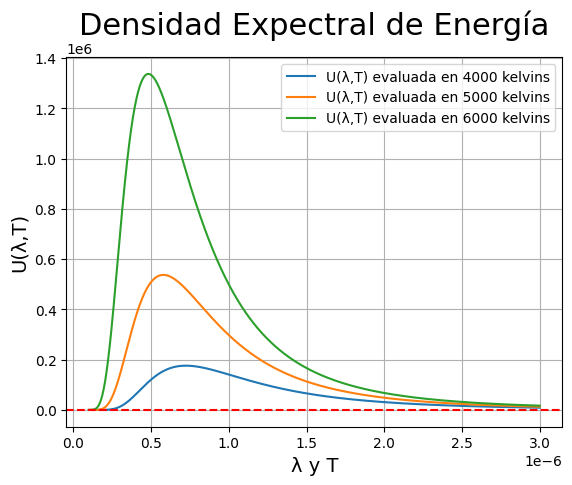

In [132]:
T=numpy.array([4000,5000,6000]) #Array de T
λ = numpy.linspace(1e-7, 3e-6, 1000)
#se grafica la Densidad Expectral de Energía
for i in T:
    plotlib.plot(λ,u(λ,i), label=f"U(λ,T) evaluada en {i} kelvins")
plotlib.legend()
plotlib.grid()
plotlib.axhline(0,color="red",linestyle="--")
plotlib.title("Densidad Expectral de Energía",fontsize=22)
plotlib.xlabel("λ y T", fontsize=14)
plotlib.ylabel("U(λ,T)", fontsize=14)
plotlib.show()


In [133]:
def derivada_parcial(λ, T):
    """
    Calcula la derivada parcial de la densidad espectral de energía de la radiación de cuerpo negro respecto a la longitud de onda.

    Parámetros:
    λ : float
        Longitud de onda en metros.
    T : float
        Temperatura en Kelvin.

    Retorna:
    float : Valor de la derivada parcial respecto a λ.

    Notas:
    - Se basa en la ley de Planck y su diferenciación respecto a λ.
    - h es la constante de Planck en J·s.
    - k_b es la constante de Boltzmann en J/K.
    - c es la velocidad de la luz en m/s.
    - Se introduce la variable adimensional x = λ / λ₀ para simplificar la expresión.
    - La expresión incluye factores exponenciales que afectan la estabilidad numérica.
    """
    
    h = 6.626e-34  # Constante de Planck (J·s)
    k_b = 1.381e-23  # Constante de Boltzmann (J/K)
    c = 2.998e8  # Velocidad de la luz (m/s)
    
    λ0 = (h * c) / (k_b * T)  # Escala característica de longitud de onda
    x = λ / λ0  # Variable adimensional
    K = (8 * numpy.pi * k_b * T) / (λ0**4)  # Factor de normalización
    
    derivada = ((K * λ0) * ((5 * x) + (1 - 5 * x) * (numpy.exp(1 / x)) / (x**7 * ((numpy.exp(1 / x)) - 1)**2)))
    
    return derivada

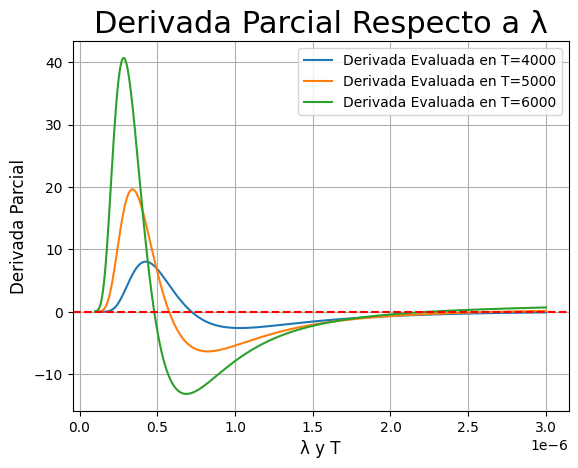

In [134]:
#se grafica la Derivada Parcial Respecto a λ de la Densidad Expectral de Energía
for i in T:
    plotlib.plot(λ,derivada_parcial(λ,i), label=f"Derivada Evaluada en T={i}")
plotlib.legend()
plotlib.grid()
plotlib.title("Derivada Parcial Respecto a λ", fontsize=22)
plotlib.xlabel("λ y T", fontsize=12)
plotlib.ylabel("Derivada Parcial",fontsize=12)
plotlib.axhline(0,color="red",linestyle="--")
plotlib.show()

In [135]:
def derivada_parcial_T_constante(λ):
    """
    Calcula la derivada parcial de la densidad espectral de energía respecto a la longitud de onda,
    manteniendo la temperatura constante.

    Parámetros:
    λ : float
        Longitud de onda en metros.

    Retorna:
    float : Valor de la derivada parcial respecto a λ.

    Notas:
    - Se basa en la ecuación de Planck diferenciada respecto a λ.
    - Se asume que la temperatura es constante (T = 5778 K) para permitir la aplicación de métodos numéricos.
    - h es la constante de Planck en J·s.
    - k_b es la constante de Boltzmann en J/K.
    - c es la velocidad de la luz en m/s.
    - Se introduce la variable adimensional x = λ / λ₀ para simplificar la expresión.
    - La expresión involucra términos exponenciales y divisiones por potencias de x, lo que puede afectar la estabilidad numérica.
    """
    
    h = 6.626e-34  # Constante de Planck (J·s)
    k_b = 1.381e-23  # Constante de Boltzmann (J/K)
    T = 5778  # Temperatura constante en Kelvin (aproximadamente la temperatura de la superficie solar)
    c = 2.998e8  # Velocidad de la luz (m/s)
    
    λ0 = (h * c) / (k_b * T)  # Escala característica de longitud de onda
    x = λ / λ0  # Variable adimensional
    K = (8 * numpy.pi * k_b * T) / (λ0**4)  # Factor de normalización
    
    derivada = ((K * λ0) * ((5 * x) + (1 - 5 * x) * (numpy.exp(1 / x)) / (x**7 * ((numpy.exp(1 / x)) - 1)**2)))
    
    return derivada

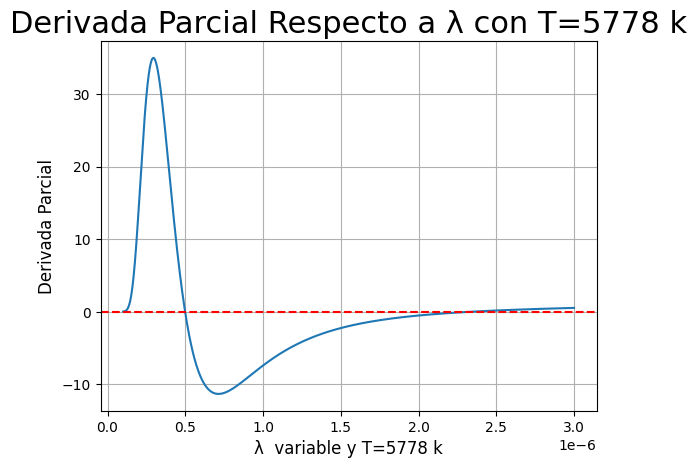

In [136]:
#se grafica la función para T=5778 kelvins
plotlib.plot(λ,derivada_parcial_T_constante(λ))
plotlib.grid()
plotlib.title("Derivada Parcial Respecto a λ con T=5778 k", fontsize=22)
plotlib.xlabel("λ  variable y T=5778 k", fontsize=12)
plotlib.ylabel("Derivada Parcial",fontsize=12)
plotlib.axhline(0,color="red",linestyle="--")
plotlib.show()

In [137]:
def biseccion (f,a,b,tol,maxiter):
    n=[]
    N=0
    if f(a)*f(b)>0: #Evaluamos el signo de la función para saber si hay raíz en [a.b]
        raise ValueError("f(a) y f(b) deben tener signos contrarios")
    else:
        for i in range(maxiter+1):#controlamos el máximo de iteraciones
            c=(a+b)/2 #punto medio
            
        
            if abs(f(c))<tol: #revisamos la convergencia
                
                return c #es la raíz
            elif f(c)*f(a)<0: #Evaluamos la condición para el nuevo intervalo [a,c]
                b=c #actualizamos valores
            else:
                a=c #de lo contrario será [c,b]
            N+=1
        raise RuntimeError("Máximo de iteraciones alcanzado")

In [94]:
raiz1=biseccion(derivada_parcial_T_constante,0.3e-6,1e-6,1e-14,1000000) #se encuentra la primera raíz (máximo)
print(raiz1)

4.98837996042709e-07


In [95]:
raiz2=biseccion(derivada_parcial_T_constante, 1.5e-6,2.5e-6,1e-14,100000) #se encuentra la segunda raíz (mínimo)
print(raiz2)

2.328161676270852e-06


In [96]:
#validar la ley de desplazamiento de wien
print(raiz1*5788)
#efectivamente se satisface la ley de Wien

0.0028872743210951995


# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

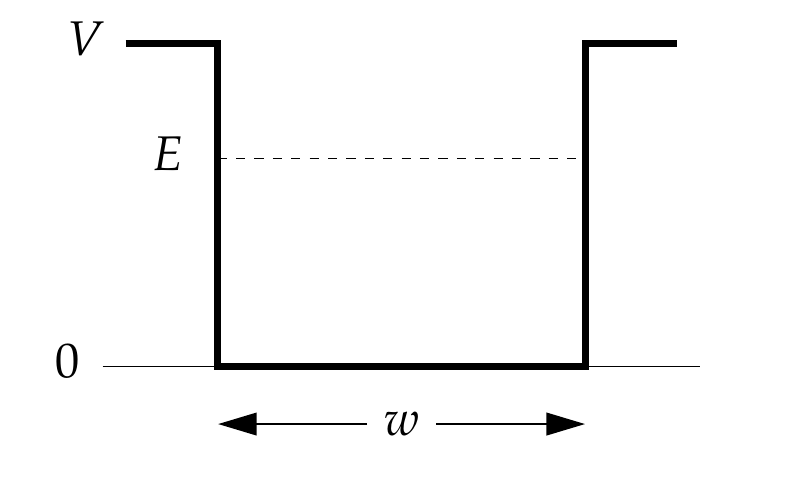

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} = 
\begin{cases} 
\sqrt{(V - E) / E} & \text{para los estados pares,} \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

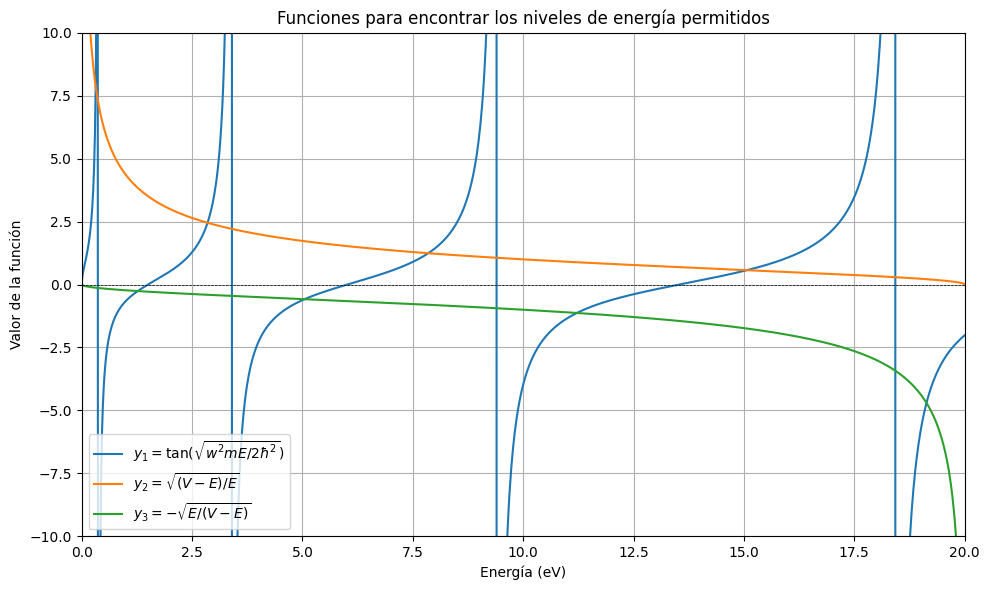

In [98]:
import numpy as numpy
import matplotlib.pyplot as plotlib

# Constantes físicas
hbar = 1.0545718e-34  # Js
m = 9.11e-31  # kg (masa del electrón)
eV = 1.602e-19  # J (1 eV en joules)
V0 = 20 * eV  # profundidad del pozo en J
w = 1e-9  # ancho del pozo en metros

# Energía (E) de 0 a V0 en eV
E_vals = numpy.linspace(0.001, 19.999, 1000)  # un poco menor que 20 para evitar división por 0
E_joules = E_vals * eV

# Cálculos de las funciones
k_vals = numpy.sqrt(w**2 * m * E_joules / (2 * hbar**2))
y1 = numpy.tan(k_vals)

# Máscara para evitar valores inválidos
mask = (E_joules > 0) & (E_joules < V0)

y2 = numpy.full_like(E_joules, numpy.nan)
y3 = numpy.full_like(E_joules, numpy.nan)
y2[mask] = numpy.sqrt((V0 - E_joules[mask]) / E_joules[mask])
y3[mask] = -numpy.sqrt(E_joules[mask] / (V0 - E_joules[mask]))

# Graficar
plotlib.figure(figsize=(10, 6))
plotlib.plot(E_vals, y1, label=r'$y_1 = \tan(\sqrt{w^2 m E / 2 \hbar^2})$')
plotlib.plot(E_vals, y2, label=r'$y_2 = \sqrt{(V - E)/E}$')
plotlib.plot(E_vals, y3, label=r'$y_3 = -\sqrt{E/(V - E)}$')
plotlib.ylim(-10, 10)
plotlib.xlim(0, 20)
plotlib.xlabel('Energía (eV)')
plotlib.ylabel('Valor de la función')
plotlib.title('Funciones para encontrar los niveles de energía permitidos')
plotlib.axhline(0, color='black', linestyle='--', linewidth=0.5)
plotlib.legend()
plotlib.grid(True)
plotlib.tight_layout()
plotlib.show()

In [100]:
import numpy as numpy

# Constantes
hbar = 1.0545718e-34  # Js
m = 9.11e-31  # kg
eV = 1.602e-19  # J
V0 = 20 * eV
w = 1e-9  # m

# Energía en Joules
def f(E_joules, parity):
    k = numpy.sqrt(w**2 * m * E_joules / (2 * hbar**2))
    tan_term = numpy.tan(k)
    if parity == "even":
        rhs = numpy.sqrt((V0 - E_joules) / E_joules)
    else:  # odd
        rhs = -numpy.sqrt(E_joules / (V0 - E_joules))
    return tan_term - rhs

# Método de bisección
def bisection(parity, a_eV, b_eV, tol=0.001):
    a = a_eV * eV
    b = b_eV * eV
    while (b - a) > tol * eV:
        c = (a + b) / 2
        if f(a, parity) * f(c, parity) < 0:
            b = c
        else:
            a = c
    return (a + b) / (2 * eV)  # convertir a eV

# Estimaciones iniciales (basadas en gráfica)
intervals = [
    (0.1, 1.5),   # estado 0 (par)
    (1.5, 3.5),   # estado 1 (impar)
    (3.5, 6),     # estado 2 (par)
    (6, 8.5),     # estado 3 (impar)
    (8.5, 11),    # estado 4 (par)
    (11, 13.5),   # estado 5 (impar)
]

# Resolver niveles
niveles = []
for i, (a, b) in enumerate(intervals):
    parity = "even" if i % 2 == 0 else "odd"
    energia = bisection(parity, a, b)
    niveles.append(energia)
    print(f"Nivel {i}: {energia:.3f} eV")


Nivel 0: 1.500 eV
Nivel 1: 3.384 eV
Nivel 2: 6.000 eV
Nivel 3: 8.500 eV
Nivel 4: 9.401 eV
Nivel 5: 11.216 eV


# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

In [101]:
G = 6.674e-11           # Constante de gravitación universal (m^3 kg^-1 s^-2)
M = 5.974e24            # Masa de la Tierra (kg)
m = 7.348e22            # Masa de la Luna (kg)
R = 3.844e8             # Distancia entre Tierra y Luna (m)
omega = 2.662e-6        # Velocidad angular (s^-1)


In [106]:
def f(r):
    return (G * M) / r**2 - (G * m) / (R - r)**2 - omega**2 * r

def df(r):  # Derivada de f(r)
    return (-2 * G * M) / r**3 - (2 * G * m) / (R - r)**3 - omega**2

# Parámetros físicos
G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
omega = 2.662e-6
# Estimación inicial
r0 = 3.2e8  # m

# Calcular la distancia al punto L1
r_l1 = NewtonRaphson(f, df, r0)
print(f"Distancia desde la Tierra hasta L1: {r_l1:.2f} m")
print(f"Distancia relativa (r/R): {r_l1/R:.6f}")


Distancia desde la Tierra hasta L1: 326045071.67 m
Distancia relativa (r/R): 0.848192
